In [1]:
#Activity 4: Linear Regression - Gradient Descent

In [2]:
import pandas as pd
import numpy as np

# Leer datos
data = pd.read_csv('./data/train.csv')

# Extraer dichas columnas
newData = data[['GrLivArea','SalePrice']]
print(newData.head())

# Contruir x - y
x = newData['GrLivArea']
y = newData['SalePrice']

# Standarizar los datos
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

print("Shape of X: ", x.shape)
print("Shape of y:", y.shape)

   GrLivArea  SalePrice
0       1710     208500
1       1262     181500
2       1786     223500
3       1717     140000
4       2198     250000
Shape of X:  (1460, 2)
Shape of y: (1460,)


In [3]:
#4.1 gradient_descenf function definition
def gradient_descent(x, y, w, iterations, eta):
    #Iterations
    nTrainings = len(y)
    #Arrays to store loss and weights at every point
    loss_history = np.zeros(iterations)
    weights_history = np.zeros((iterations, x.shape[1]))

    for i in range(iterations):
        #Predictions at the current weight
        y_hat = np.dot(x, w)
        #Residual error
        error = y_hat - y
        #Loss function gradient: it makes a matrix of partial derivatives to get the average partial derivative to each weight
        gradient = np.dot(x.T, error) / nTrainings
        #The idea on this function is to update the weights to the negative gradient of the loss function. It applies to each iteration.
        w -= eta * gradient
        #MSE (current loss)
        loss = np.sum((y_hat - y) ** 2) / (2 * nTrainings)
        #Array to save every value fo weights and loss.
        loss_history[i] = loss
        weights_history[i, :] = w.T

    return weights_history, loss_history

In [4]:
import numpy as np

# Learning rate
eta = 0.001

# Número de iteraciones
iterations = 1000 #No. of iterations

# Seed para inicializar w
np.random.seed(123)
w0 = np.random.rand(2)

weights, loss = gradient_descent(x, y, w0, iterations, eta)

print(weights[-1])

[114397.55600595  35581.43273844]


MovieWriter imagemagick unavailable; using Pillow instead.



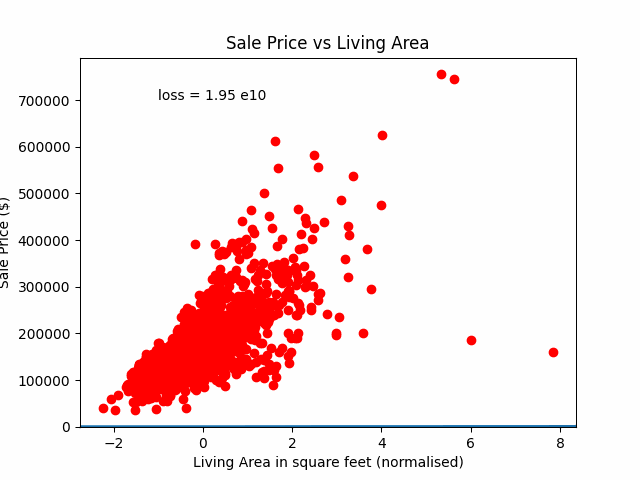

In [5]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Definir figure
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

# Generar animacion de los datos
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# Función para la animación
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = weights[i][1]*x + weights[i][0]
    line.set_data(x, y)
    annotation.set_text('loss = %.2f e10' % (loss[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 30)

# Visualizar la animación
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))